In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt
import seaborn as sns

In [50]:
#read data
data=pd.read_csv("data.csv")
data.shape

C:\Users\Martina\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (91,93,163,169,172,173) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(51715, 412)

In [51]:
#display data
data[:10]

,gwgroupid,countries_gwid,year,groupname,countryname,isactive,isrelevant,groupsize,statusid,statusname,...,urban_gc_median,urban_gc_max,urban_gc_min,water_gc_wsum,water_gc_wmean,water_gc_sum,water_gc_mean,water_gc_median,water_gc_max,water_gc_min
0,201000,2,1946,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201000,2,1947,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201000,2,1948,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201000,2,1949,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201000,2,1950,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,201000,2,1951,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,201000,2,1952,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,201000,2,1953,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,201000,2,1954,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,201000,2,1955,Whites,United States,1,1,0.691,1.0,MONOPOLY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


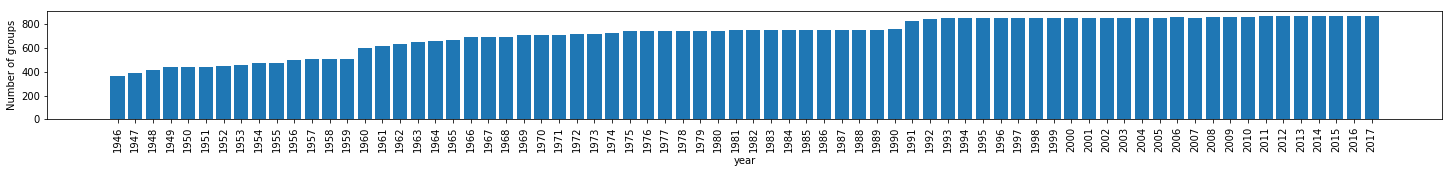

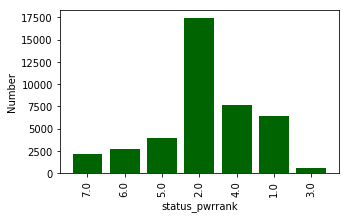

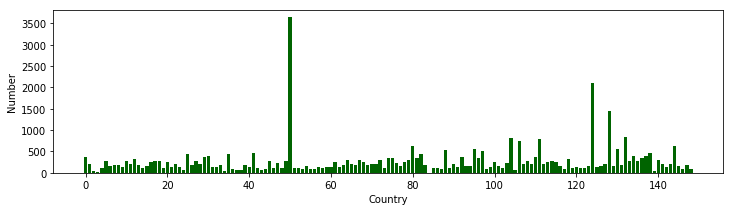

In [52]:
#Count years (year distribution)
plt.figure(1)

from collections import Counter

year = dict(Counter(data['year']))
plt.figure(figsize=(25, 2))   
plt.bar(range(len(year)), height = list(year.values()), 
             tick_label = list(year.keys()))
plt.xticks(rotation=90)
plt.xlabel("year")
plt.ylabel("Number of groups")
plt.show()

positionnan=[]
for i in data.index:
    if np.isnan(data["status_pwrrank"][i]):
        positionnan.append(i)
data1 = data.drop(data.index[positionnan])

#Count powe rank
plt.figure(2)
power = dict(Counter(data1['status_pwrrank']))
plt.figure(figsize=(5, 3))   
plt.bar(range(len(power)), height = list(power.values()), 
             tick_label = list(power.keys()), color='darkgreen')
plt.xticks(rotation=90)
plt.xlabel("status_pwrrank")
plt.ylabel("Number")

#Count Countries
country= dict(Counter(data1['countryname']))
plt.figure(figsize=(12, 3))   
plt.bar(range(len(country)), height = list(country.values()), color='darkgreen')
#plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Number")
plt.show()


In [53]:
#Eliminating string type varibles
for i in data.columns:
    if data[i].dtype=="O":
        data.drop([i],axis=1,inplace=True)
        print(i)
        
data.shape

groupname
countryname
statusname
active_des_groupid_arr
relevant_des_groupid_arr
geo_typename
ggp_startdate
ggp_enddate
tek_groupid_arr
ed_religion1
ed_religion2
ed_religion3
ed_language1
ed_language2
ed_language3
ed_phenotype1
ed_phenotype2
ed_phenotype3


(51715, 394)

In [54]:
#Calculate the correlation matrix
corrdata=data.corr().abs()
corrdata.to_csv("corrdata.csv")

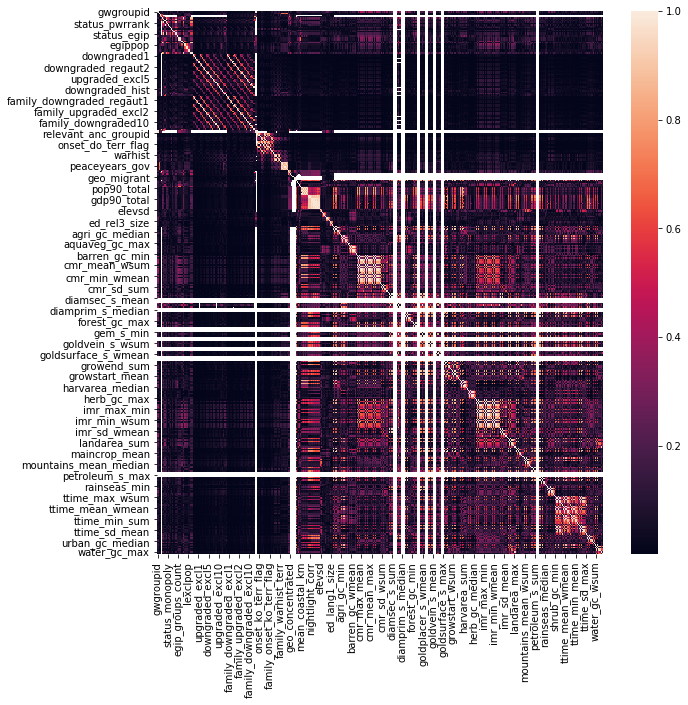

In [55]:
#Plot the correlation matrix
plt.figure(figsize=(10, 10))   
sns.heatmap(corrdata, 
            #xticklabels=corrdata.columns.values,
            #yticklabels=corrdata.columns.values
           )
plt.show()

In [56]:
#Correlation with variable "year"
print("year:")
cor_target = abs(corrdata["year"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

year:


year                      1.000000
peaceyears                0.665472
peaceyears_terr           0.723164
peaceyears_gov            0.726772
family_peaceyears         0.642218
family_peaceyears_terr    0.721680
family_peaceyears_gov     0.702742
Name: year, dtype: float64

In [57]:
#First reduction of features: eliminating the redundant features
for i in data.columns:
    if "family" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_max" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_min" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_mean" in i and "imr" not in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_wsum" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_sd" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_wmean" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_median" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "tek_" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
    elif "_excl" in i:
        data.drop([i], axis=1, inplace=True)
        print(i)
         
data.to_csv('data_reduced.csv', sep=',')

status_excl
downgraded_excl1
upgraded_excl1
downgraded_excl2
upgraded_excl2
downgraded_excl5
upgraded_excl5
downgraded_excl10
upgraded_excl10
downgraded_excl_hist
upgraded_excl_hist
family_downgraded1
family_downgraded_excl1
family_downgraded_regaut1
family_upgraded1
family_upgraded_excl1
family_upgraded_regaut1
family_downgraded2
family_downgraded_excl2
family_downgraded_regaut2
family_upgraded2
family_upgraded_excl2
family_upgraded_regaut2
family_downgraded5
family_downgraded_excl5
family_downgraded_regaut5
family_upgraded5
family_upgraded_excl5
family_upgraded_regaut5
family_downgraded10
family_downgraded_excl10
family_downgraded_regaut10
family_upgraded10
family_upgraded_excl10
family_upgraded_regaut10
family_isrelevant
family_onset_ko_flag
family_onset_ko_terr_flag
family_onset_ko_gov_flag
family_incidence_flag
family_incidence_terr_flag
family_incidence_gov_flag
family_warhist
family_warhist_terr
family_warhist_gov
family_peaceyears
family_peaceyears_terr
family_peaceyears_gov
te

In [61]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.drop(['imr_mean_mean'], axis=1, inplace=True)
data.shape

(51715, 126)

In [62]:
#Eliminating the rows where the target variable is Nan
positionnan=[]
for i in data.index:
    if np.isnan(data["imr_mean_sum"][i]):
        positionnan.append(i)
data = data.drop(data.index[positionnan])

data[data.isnull()]=0 #set to zero the absent values

data.shape

(32631, 126)

In [63]:
#Eliminating rows where the correlation is Nan
corrdata=data.corr()

positionnan=[]
for i in corrdata.columns:
    if np.isnan(corrdata[i][i]):
        positionnan.append(i)
data.drop(positionnan, axis=1, inplace=True)

In [64]:
#Split data in train and test

#select target variable
target = 'imr_mean_sum'


num_rows = data.shape[0]
print(num_rows)

train_x = data.iloc[:int((num_rows)*0.8)]
vt_x = data.iloc[int((num_rows)*0.8):]

train_x.drop([target], axis=1, inplace=True)
vt_x.drop([target], axis=1, inplace=True)


train_y = data.iloc[:int(num_rows*0.8)][target]
vt_y = data.iloc[int(num_rows*0.8):][target]

nr_vt = vt_x.shape[0]
val_x = vt_x.iloc[:(int((nr_vt)*0.5))]
test_x= vt_x.iloc[(int((nr_vt)*0.5)):]

val_y = vt_y.iloc[:(int((nr_vt)*0.5))]
test_y= vt_y.iloc[(int((nr_vt)*0.5)):]

print("train_x, train_y:", train_x.shape, train_y.shape)
print("validation_x, validation_y:", val_x.shape, val_y.shape)
print("test_x, test_y:", test_x.shape, test_y.shape)
#train.to_csv('training_reduced2.csv', sep=',')

#normalization for the features
#Mean and sd
train_x_mean = np.mean(train_x, axis = 0) 
train_x_std = np.std(train_x, axis = 0)

train_y_mean = np.mean(train_y, axis = 0) 
train_y_std = np.std(train_y, axis = 0)

val_y_mean = np.mean(train_y, axis = 0) 
val_y_std = np.std(train_y, axis = 0)

val_x_mean = np.mean(train_x, axis = 0) 
val_x_std = np.std(train_x, axis = 0)

#Normalization
train_x = (train_x - train_x_mean)/(train_x_std + 1e-10)
val_x = (val_x - val_x_mean)/(val_x_std + 1e-10)

train_y = (train_y - train_y_mean)/(train_y_std + 1e-10)
val_y = (val_y - val_y_mean)/(val_y_std + 1e-10)

test_x_mean = np.mean(test_x, axis = 0) 
test_x_std = np.std(test_x, axis = 0)

test_y_mean = np.mean(test_y, axis = 0) 
test_y_std = np.std(test_y, axis = 0)

test_x = (test_x - test_x_mean)/(test_x_std + 1e-10)
test_y = (test_y - test_y_mean)/(test_y_std + 1e-10)

32631


C:\Users\Martina\Miniconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


train_x, train_y: (26104, 115) (26104,)
validation_x, validation_y: (3263, 115) (3263,)
test_x, test_y: (3264, 115) (3264,)


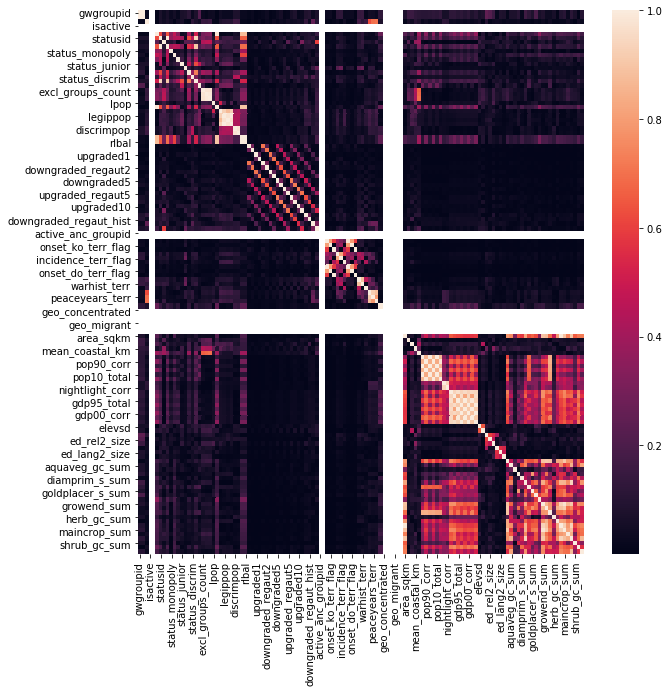

In [66]:
#Plot the correlation matrix
plt.figure(figsize=(10, 10))   
sns.heatmap(corrdata.abs(), 
            #xticklabels=corrdata.columns.values,
            #yticklabels=corrdata.columns.values
           )
plt.show()